In [74]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

import struggle_7
from struggle_7 import posts_collector, comments_collector
from struggle_7 import access_token, api_version, offset, count, domain, owner_id, posts

In [75]:
%matplotlib inline

In [101]:
#Создаем DataFrame (таблицу) с колонками:
columns = ['id', 'post_likes', 'text', 'post_pics', 'date']
df = pd.DataFrame(data=posts, columns=columns)
df.sample(7)

,id,post_likes,text,post_pics,date
904,4337,162,23 октября - «Манон Леско» на ваших экранах!\n...,False,22/10/16 15:02
1100,2158,72,Памятник Марине Семеновой! - Marina Semyonova’...,True,16/10/15 19:00
970,3739,49,"Сегодня, 5 июля, День рождения празднует дириж...",True,05/07/16 12:05
1515,768,32,"Балет ""Драгоценности"" Дж.Баланчина можно увиде...",True,29/08/14 12:13
1411,901,48,Великие и любимые Майя Плисецкая и Ив Сен-Лора...,True,30/10/14 15:53
1918,300,0,Уважаемые журналисты!\n\nПриглашаем на премьер...,False,11/10/13 15:00
1388,926,7,"Сегодня, 13 ноября, День рождения отмечают сол...",True,13/11/14 12:24


In [102]:
# к строкам можно делать срез по индексам
# df.loc[100:109]

In [111]:
filter_data = df[(df['date'] > '16/05/13 00:00') & (df['date'] < '30/06/13 00:00')]
filter_data

,id,post_likes,text,post_pics,date
4,10976,166,"Сегодня, 29 октября, день рождения празднует л...",True,29/10/19 13:02
5,10963,30,В этом году у поклонников Большого появилась в...,True,28/10/19 18:00
6,10946,153,"Мы знаем, как сделать понедельник лучше!😉Полна...",True,28/10/19 10:35
7,10923,74,"Сегодня, 27 октября, день рождения празднует р...",True,27/10/19 11:15
8,10922,138,"Сегодня, 27 октября, в 18:00 на media.bolshoi....",True,27/10/19 11:06
...,...,...,...,...,...
2141,6,0,National Artist of the USSR Boris Akimov heads...,False,23/04/13 11:38
2142,5,1,Большой театр представляет новый проект: серию...,False,23/04/13 11:37
2143,4,2,Победитель конкурса «Русский балет» на один го...,True,23/04/13 11:34
2144,3,1,"Премьера оперы ""Сомнабула""/ Premiere of la Son...",True,23/04/13 11:31


In [106]:
filter_data = df[(df['date'] > '16/05/14 00:00') & (df['date'] < '30/06/14 00:00')]
filter_pics = df['post_pics'] == True
period_posts = df.loc[filter_data & filter_pics]
period_posts

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [79]:
# сколько в датафрейме строк и колонок
df.shape

(2147, 5)

In [80]:
df.describe()

,id,post_likes
count,2147.000000,2147.000000
mean,3934.581276,59.140196
std,3632.449427,70.361749
min,1.000000,0.000000
25%,646.500000,13.000000
50%,2504.000000,44.000000
75%,7358.500000,82.000000
max,11001.000000,1732.000000


In [81]:
# считаем кол-во постов, у которых больше 500 лайков
likes_more_500 = df[df.post_likes > 500].count()
likes_more_500

id            2
post_likes    2
text          2
post_pics     2
date          2
dtype: int64

In [82]:
num_likes = df.groupby(['post_likes']).size()
# num_likes.sort_values()

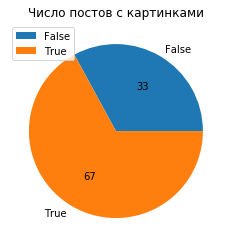

In [83]:
#кол-во постов с фото, True - есть фото
pics = df.groupby(['post_pics'])['text'].size()
plt.pie(pics, labels=pics.index, autopct='%.0f')
plt.title('Число постов с картинками')
plt.legend()

In [70]:
max_likes = df.post_likes.max()
max_likes

1732

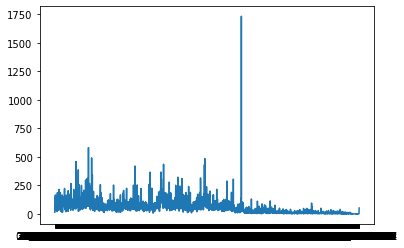

In [71]:
df_date = df.date
df_likes = df.post_likes
plt.plot(df_date, df_likes)
plt.show()